In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 텍스트 전처리

In [42]:
df = pd.read_csv("./fintech_news.csv")
df

,뉴스제목,원문링크,출처,날짜
0,[한국핀테크지원센터] 2025 핀테크 전문가(개발자) 과정 ‘FinBoost Aca...,https://fintech.or.kr/web/board/boardContentsV...,NaN,NaN
1,[한국핀테크산업협회] 네트워킹 행사 '핀테크 커넥팅 데이 2025' 개최(11.26...,https://fintech.or.kr/web/board/boardContentsV...,NaN,NaN
2,[한국핀테크지원센터] (온라인) 핀테크를 통한 금융 AI 트렌드와 혁신 사례 교육생...,https://fintech.or.kr/web/board/boardContentsV...,NaN,NaN
3,[한국핀테크지원센터] 2025년 핀테크기업 온라인 채용관 (사람인 saramin) ...,https://fintech.or.kr/web/board/boardContentsV...,NaN,NaN
4,"금감원, IMA·발행어음 증권사 임원 대상 간담회 개최… 모험자본·리스크·소비자보호 당부",https://n.news.naver.com/mnews/article/029/000...,디지털타임스,11/20
...,...,...,...,...
11064,"트럼프 취임 코앞…연준 비둘기파 ""인플레와 싸움 안 끝나""",https://n.news.naver.com/mnews/article/001/001...,연합뉴스,1/5
11065,"中서 할인하고 구애하더니 '팽'…""애플 겨울이 왔다""",https://n.news.naver.com/mnews/article/374/000...,SBS비즈,1/6
11066,"일본, AI로 전면 재등장",https://n.news.naver.com/mnews/article/023/000...,조선일보,1/6
11067,[산업은행] 2025년 상반기 KDB NextONE 참여 스타트업 모집(서울/부산)...,https://fintech.or.kr/web/board/boardContentsV...,NaN,NaN


In [43]:
df.columns

Index(['뉴스제목', '원문링크', '출처', '날짜'], dtype='object')

In [44]:
df = df[['뉴스제목', '원문링크']].copy()
df

,뉴스제목,원문링크
0,[한국핀테크지원센터] 2025 핀테크 전문가(개발자) 과정 ‘FinBoost Aca...,https://fintech.or.kr/web/board/boardContentsV...
1,[한국핀테크산업협회] 네트워킹 행사 '핀테크 커넥팅 데이 2025' 개최(11.26...,https://fintech.or.kr/web/board/boardContentsV...
2,[한국핀테크지원센터] (온라인) 핀테크를 통한 금융 AI 트렌드와 혁신 사례 교육생...,https://fintech.or.kr/web/board/boardContentsV...
3,[한국핀테크지원센터] 2025년 핀테크기업 온라인 채용관 (사람인 saramin) ...,https://fintech.or.kr/web/board/boardContentsV...
4,"금감원, IMA·발행어음 증권사 임원 대상 간담회 개최… 모험자본·리스크·소비자보호 당부",https://n.news.naver.com/mnews/article/029/000...
...,...,...
11064,"트럼프 취임 코앞…연준 비둘기파 ""인플레와 싸움 안 끝나""",https://n.news.naver.com/mnews/article/001/001...
11065,"中서 할인하고 구애하더니 '팽'…""애플 겨울이 왔다""",https://n.news.naver.com/mnews/article/374/000...
11066,"일본, AI로 전면 재등장",https://n.news.naver.com/mnews/article/023/000...
11067,[산업은행] 2025년 상반기 KDB NextONE 참여 스타트업 모집(서울/부산)...,https://fintech.or.kr/web/board/boardContentsV...


In [5]:
!pip install konlpy

In [6]:
import re
from konlpy.tag import Mecab
mecab = Mecab()

In [7]:
def text_clean(x):
    # 한글, 영문대소문자, 숫자만 남기고 모두 제거
    cleaned = re.sub(r'[^가-힣a-zA-Z0-9]', " ", x)
    cleaned = cleaned.replace("  ", " ").replace("  ", " ").strip()
    return cleaned

In [8]:
def tokenizer(text):
    tokens = mecab.morphs(text)
    return tokens

In [9]:
df.dropna()

,뉴스제목,원문링크
0,[한국핀테크지원센터] 2025 핀테크 전문가(개발자) 과정 ‘FinBoost Aca...,https://fintech.or.kr/web/board/boardContentsV...
1,[한국핀테크산업협회] 네트워킹 행사 '핀테크 커넥팅 데이 2025' 개최(11.26...,https://fintech.or.kr/web/board/boardContentsV...
2,[한국핀테크지원센터] (온라인) 핀테크를 통한 금융 AI 트렌드와 혁신 사례 교육생...,https://fintech.or.kr/web/board/boardContentsV...
3,[한국핀테크지원센터] 2025년 핀테크기업 온라인 채용관 (사람인 saramin) ...,https://fintech.or.kr/web/board/boardContentsV...
4,"금감원, IMA·발행어음 증권사 임원 대상 간담회 개최… 모험자본·리스크·소비자보호 당부",https://n.news.naver.com/mnews/article/029/000...
...,...,...
11064,"트럼프 취임 코앞…연준 비둘기파 ""인플레와 싸움 안 끝나""",https://n.news.naver.com/mnews/article/001/001...
11065,"中서 할인하고 구애하더니 '팽'…""애플 겨울이 왔다""",https://n.news.naver.com/mnews/article/374/000...
11066,"일본, AI로 전면 재등장",https://n.news.naver.com/mnews/article/023/000...
11067,[산업은행] 2025년 상반기 KDB NextONE 참여 스타트업 모집(서울/부산)...,https://fintech.or.kr/web/board/boardContentsV...


In [45]:
df.loc[:, '뉴스제목'] = df['뉴스제목'].apply(text_clean)

In [46]:
df['뉴스제목']

0        한국핀테크지원센터 2025 핀테크 전문가 개발자 과정 FinBoost Academy...
1        한국핀테크산업협회 네트워킹 행사 핀테크 커넥팅 데이 2025 개최 11 26 신청 ...
2         한국핀테크지원센터 온라인 핀테크를 통한 금융 AI 트렌드와 혁신 사례 교육생 모집 상시
3        한국핀테크지원센터 2025년 핀테크기업 온라인 채용관 사람인 saramin 참여기업...
4          금감원 IMA 발행어음 증권사 임원 대상 간담회 개최 모험자본 리스크 소비자보호 당부
                               ...                        
11064                       트럼프 취임 코앞 연준 비둘기파 인플레와 싸움 안 끝나
11065                             서 할인하고 구애하더니 팽 애플 겨울이 왔다
11066                                        일본 AI로 전면 재등장
11067    산업은행 2025년 상반기 KDB NextONE 참여 스타트업 모집 서울 부산 25...
11068                  우리금융그룹 디노랩 부산 1기 참여 스타트업 모집 25 1 12
Name: 뉴스제목, Length: 11069, dtype: object

# wordcloud화

In [12]:
!pip install wordcloud

In [13]:
from wordcloud import WordCloud

In [14]:
text_data = df['뉴스제목'].astype(str).tolist()
full_text = " ".join(text_data)

In [15]:
df['뉴스제목'] = df['뉴스제목'].astype(str).apply(text_clean)

In [16]:
df['뉴스제목']

0        한국핀테크지원센터 2025 핀테크 전문가 개발자 과정 FinBoost Academy...
1        한국핀테크산업협회 네트워킹 행사 핀테크 커넥팅 데이 2025 개최 11 26 신청 ...
2         한국핀테크지원센터 온라인 핀테크를 통한 금융 AI 트렌드와 혁신 사례 교육생 모집 상시
3        한국핀테크지원센터 2025년 핀테크기업 온라인 채용관 사람인 saramin 참여기업...
4          금감원 IMA 발행어음 증권사 임원 대상 간담회 개최 모험자본 리스크 소비자보호 당부
                               ...                        
11064                       트럼프 취임 코앞 연준 비둘기파 인플레와 싸움 안 끝나
11065                             서 할인하고 구애하더니 팽 애플 겨울이 왔다
11066                                        일본 AI로 전면 재등장
11067    산업은행 2025년 상반기 KDB NextONE 참여 스타트업 모집 서울 부산 25...
11068                  우리금융그룹 디노랩 부산 1기 참여 스타트업 모집 25 1 12
Name: 뉴스제목, Length: 11069, dtype: object

In [17]:
from konlpy.tag import Mecab
mecab = Mecab()
nouns = mecab.nouns(full_text)

In [18]:
stopwords = set(['한국핀테크지원센터', '한국핀테크산업협회', '핀테크', '채용관', '핀테크기업', '기업', '은행', '사람인', 'saramin',
                 '상반기', '참여', '한국', '뱅크', '과정', '업계', '기준', '분기', '프로그램', '개최', '지원', '금융', '센터', '모집', 
                 '2025', '2025년', '금융당국', '공고'])

In [19]:
filtered = [
    word for word in nouns
    if len(word) > 1 and word not in stopwords
]

In [20]:
from collections import Counter
word_freq = Counter(filtered)
word_freq

Counter({'대출': 924,
         '보험': 745,
         '금리': 723,
         '코인': 597,
         '금감원': 558,
         '투자': 532,
         '카카오': 475,
         '스테이': 466,
         '카드': 450,
         '시장': 439,
         '예산': 422,
         '소진': 418,
         '교육': 399,
         '페이': 368,
         '자산': 355,
         '서비스': 353,
         '디지털': 342,
         '토스': 333,
         '결제': 322,
         '규제': 313,
         '강화': 313,
         '트럼프': 312,
         '혁신': 295,
         '관세': 282,
         '선착순': 280,
         '당국': 267,
         '해외': 265,
         '저축': 253,
         '테스트': 247,
         '증권': 242,
         '시대': 242,
         '연금': 224,
         '스타트업': 224,
         '온라인': 213,
         '인하': 213,
         '확대': 212,
         '달러': 210,
         '출시': 209,
         '신용': 206,
         '글로벌': 198,
         '거래': 193,
         '예금': 190,
         '최대': 190,
         '테크': 188,
         '서울': 188,
         '가상': 188,
         '경쟁': 183,
         '데이터': 178,
         '운영': 178,
       

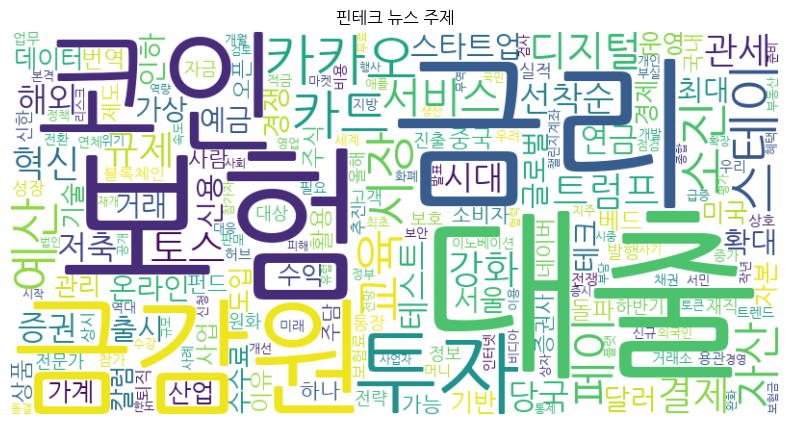

In [21]:
wc = WordCloud(
        font_path='NanumGothic.ttf',
        background_color='white',
        width=800,
        height=400).generate_from_frequencies(word_freq)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("핀테크 뉴스 주제")
plt.show()

# LDA 모델링

In [22]:
!pip install gensim 

In [23]:
from gensim.models import CoherenceModel
from gensim import corpora
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [24]:
# mecab 으로 명사만 추출해서 길이가 2 이상인 것만 모아서 리스트로 만드는 함수
def tokenize_texts(text_data):
    return [[word for word in mecab.nouns(doc) if len(word) > 1] for doc in text_data]

In [28]:
result = []
for doc in text_data:
    for word in mecab.nouns(doc):
        if len(word) > 1:
            result.append(word)

In [29]:
def find_optimal_topics(text_data, start=2, end=8):
    # text_data는 문자열 리스트
    tokenized_texts = tokenize_texts(text_data)
    if not tokenized_texts:
        return start
    # gensim으로 BoW(숫자로 인코딩 된 단어 모음)
    dictionary = corpora.Dictionary(tokenized_texts)
    vectorizer = CountVectorizer(tokenizer=lambda x: x, lowercase=False)
    
    try:
        doc_term_matrix = vectorizer.fit_transform(tokenized_texts)
    except:
        print("벡터화중 오류발생, 기본 토픽 수 2개 반환")
        return start
    
    best_score = -1
    best_n = start
    
    # LDA 분석
    for n_topics in range(start, end+1):
        lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
        lda_model.fit(doc_term_matrix)
        
        feature_names = vectorizer.get_feature_names_out()
        # 상위 10개의 단어를 순서대로 추출
        topics = [[feature_names[i] for i in topic.argsort()[:-11:-1]] for topic in lda_model.components_]
        
        # 응집도 계산
        cm = CoherenceModel(topics=topics, texts=tokenized_texts, dictionary=dictionary, coherence="c_v")
        score = cm.get_coherence()
        print(f"토픽수: {n_topics}, Coherence Score: {score:.4f}")
        
        if score > best_score:
            best_score = score
            best_n = n_topics
    
    print(f"최적 토픽수: {best_n} (Score: {best_score:.4f})")
    return best_n

In [47]:
stopwords = set(['한국핀테크지원센터', '한국핀테크산업협회', '핀테크', '채용관', '핀테크기업', '기업', '은행', '사람인', 'saramin', '모집'
                 '상반기', '참여', '한국', '뱅크', '과정', '업계', '기준', '분기', '프로그램', '개최', '지원', '금융', '센터', '모집', 
                 '2025', '2025년', '금융당국', '공고'])

for text in text_data:
    # 리뷰 수 체크 20개 초과
    if len(df) < 20:
        print(f"{text} 리뷰수 부족 ({len(df)}개) - 스킵")
        continue

    text_data = df['뉴스제목'].dropna().astype(str).tolist()

    # 최적 토픽 수 계산
    best_k = find_optimal_topics(texts = text_data, start=2, end=8)

    vectorizer = CountVectorizer(max_df=0.9, min_df=10, stop_words=list(stopwords))
    review_vec = vectorizer.fit_transform(df)

    if review_vec.shape[1] == 0:
        print(f"{text} min_df=10 조건 만족 단어 없음 - 스킵")
        continue

    lda = LatentDirichletAllocation(n_components=best_k, learning_method='online', random_state=42)
    lda.fit(review_vec)

    words = vectorizer.get_feature_names_out()

    print(f"\n{text} {senti} 토픽 {best_k}개 - 상위 단어")
    print("=" * 100)
    for i, topic in enumerate(lda.components_):
        top = [words[idx] for idx in topic.argsort()[-10:]]
        print(f"토픽 #{i}: {top}\n")

print("=" *30, "토픽 모델링 종료", "=" *30)

/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


ValueError: max_df corresponds to < documents than min_df

In [32]:
stopwords = set([
    '한국핀테크지원센터', '한국핀테크산업협회', '핀테크', '채용관', '핀테크기업', '기업', '은행',
    '사람인', 'saramin', '모집', '상반기', '참여', '한국', '뱅크', '과정', '업계',
    '기준', '분기', '프로그램', '개최', '지원', '금융', '센터', '2025', '2025년',
    '금융당국', '공고'
])

# Mecab 토큰화
def tokenize_texts(texts):
    return [[word for word in mecab.nouns(doc) if len(word) > 1 and word not in stopwords] for doc in texts]

# 최적 토픽 수 찾기
def find_optimal_topics(texts, start=2, end=8):
    tokenized_texts = tokenize_texts(texts)
    if not tokenized_texts:
        return start

    dictionary = corpora.Dictionary(tokenized_texts)
    vectorizer = CountVectorizer(tokenizer=lambda x: x, lowercase=False)
    try:
        doc_term_matrix = vectorizer.fit_transform(tokenized_texts)
    except:
        return start

    best_score = -1
    best_n = start

    for n_topics in range(start, end+1):
        lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
        lda_model.fit(doc_term_matrix)

        feature_names = vectorizer.get_feature_names_out()
        topics = [[feature_names[i] for i in topic.argsort()[:-11:-1]] for topic in lda_model.components_]

        cm = CoherenceModel(topics=topics, texts=tokenized_texts, dictionary=dictionary, coherence="c_v")
        score = cm.get_coherence()

        if score > best_score:
            best_score = score
            best_n = n_topics

    return best_n

# 실제 분석 반복문
for text_label in df['뉴스제목']:  
    df = df['뉴스제목'] == text_label

    if len(df) < 20:
        print(f"{text_label} 리뷰수 부족 ({len(df)}) - 스킵")
        continue

    texts = df.tolist()
    best_k = find_optimal_topics(texts, start=2, end=8)

    vectorizer = CountVectorizer(max_df=0.9, min_df=10, stop_words=list(stopwords))
    review_vec = vectorizer.fit_transform(texts)

    if review_vec.shape[1] == 0:
        print(f"{text_label} 단어 부족 - 스킵")
        continue

    lda = LatentDirichletAllocation(n_components=best_k, learning_method='online', random_state=42)
    lda.fit(review_vec)

    words = vectorizer.get_feature_names_out()

    print(f"\n[{text_label}] 토픽 {best_k}개 - 상위 단어")
    print("=" * 100)
    for i, topic in enumerate(lda.components_):
        top = [words[idx] for idx in topic.argsort()[-10:]]
        print(f"토픽 #{i}: {top}")

KeyError: '뉴스제목'